In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv("final_data.csv")   
df1.head()

,id,Age,EducationLevel,Gender,HasFamilyHistory,Occupation,ATF,EAF,TKF,CMT,...,CP,NS,DZ,UR,UB,MD,TG,hasSAD,SPIN,LSAS
0,1,27,4,1,0,3,4,2,6,2,...,0,0,0,0,1,0,0,1,23,39.0
1,5,24,4,1,0,3,3,0,3,1,...,0,0,0,0,0,0,0,0,20,43.0
2,7,32,5,0,1,1,4,1,7,0,...,0,1,0,0,0,0,0,1,33,50.0
3,8,37,5,1,1,3,4,0,6,1,...,0,0,0,0,0,0,0,1,30,44.0
4,9,33,5,1,0,2,5,1,5,1,...,0,0,0,0,0,0,0,0,16,NaN


In [4]:
df1.shape

(214, 30)

In [5]:
df1.columns

Index(['id', 'Age', 'EducationLevel', 'Gender', 'HasFamilyHistory',
       'Occupation', 'ATF', 'EAF', 'TKF', 'CMT', 'DEF', 'SMF', 'ERF', 'DAF',
       'HR', 'SW', 'TR', 'DR', 'BR', 'CK', 'CP', 'NS', 'DZ', 'UR', 'UB', 'MD',
       'TG', 'hasSAD', 'SPIN', 'LSAS'],
      dtype='object')

In [6]:
x_values = df1.drop(["id", "hasSAD", "SPIN", "LSAS"], axis=1)
x_values.head()

,Age,EducationLevel,Gender,HasFamilyHistory,Occupation,ATF,EAF,TKF,CMT,DEF,...,DR,BR,CK,CP,NS,DZ,UR,UB,MD,TG
0,27,4,1,0,3,4,2,6,2,0,...,0,1,0,0,0,0,0,1,0,0
1,24,4,1,0,3,3,0,3,1,0,...,1,0,0,0,0,0,0,0,0,0
2,32,5,0,1,1,4,1,7,0,0,...,0,1,0,0,1,0,0,0,0,0
3,37,5,1,1,3,4,0,6,1,0,...,0,0,0,0,0,0,0,0,0,0
4,33,5,1,0,2,5,1,5,1,1,...,0,0,0,0,0,0,0,0,0,0


In [48]:
y_values = df1["hasSAD"]
x_values.columns

Index(['Age', 'EducationLevel', 'Gender', 'HasFamilyHistory', 'Occupation',
       'ATF', 'EAF', 'TKF', 'CMT', 'DEF', 'SMF', 'ERF', 'DAF', 'HR', 'SW',
       'TR', 'DR', 'BR', 'CK', 'CP', 'NS', 'DZ', 'UR', 'UB', 'MD', 'TG'],
      dtype='object')

In [58]:
cols= ["Gender", "HasFamilyHistory", "Occupation", "HR", "SW", "TR", "DR", "BR", "CK", "CP", "NS", "DZ", "UR",
      "UB", "MD", "TG"]
new_x_values = pd.get_dummies(x_values, columns = cols, drop_first=True)

new_x_values.columns

Index(['Age', 'EducationLevel', 'ATF', 'EAF', 'TKF', 'CMT', 'DEF', 'SMF',
       'ERF', 'DAF', 'Gender_1', 'HasFamilyHistory_1', 'Occupation_2',
       'Occupation_3', 'Occupation_4', 'Occupation_5', 'HR_1', 'SW_1', 'TR_1',
       'DR_1', 'BR_1', 'CK_1', 'CP_1', 'NS_1', 'DZ_1', 'UR_1', 'UB_1', 'MD_1',
       'TG_1'],
      dtype='object')

In [59]:
len(new_x_values.columns)

29

In [102]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

model1 = KNeighborsClassifier(n_neighbors = 10)
s1 = cross_val_score(model1,new_x_values.values, y_values, cv=10, scoring="accuracy")


In [103]:
s1

array([0.27272727, 0.13636364, 0.59090909, 0.63636364, 0.85714286,
       0.85714286, 0.9047619 , 0.9047619 , 0.9047619 , 0.95238095])

In [104]:
s1.mean()

0.7017316017316018

In [78]:
# search for k value
arr = range(1, 31)

s2 =[]
for k in arr:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, new_x_values.values, y_values, cv=10, scoring='accuracy')
    s2.append(scores.mean())

    
print(s2)

[0.6106060606060606, 0.6153679653679653, 0.7010822510822512, 0.6867965367965368, 0.719047619047619, 0.7051948051948053, 0.7287878787878788, 0.7058441558441558, 0.7199134199134198, 0.7017316017316018, 0.7246753246753247, 0.71991341991342, 0.7103896103896105, 0.7012987012987014, 0.733982683982684, 0.7246753246753247, 0.7294372294372294, 0.7067099567099567, 0.7389610389610389, 0.7158008658008658, 0.7251082251082251, 0.7203463203463204, 0.7251082251082251, 0.7341991341991342, 0.7296536796536797, 0.7296536796536797, 0.7296536796536797, 0.7114718614718615, 0.7203463203463204, 0.7248917748917749]


Text(0, 0.5, 'Cross-Validated Accuracy')

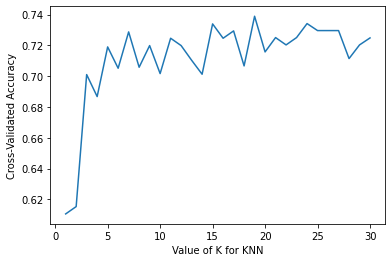

In [77]:
plt.plot(arr, s2)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [105]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier()
s3 = cross_val_score(model2,new_x_values.values, y_values, cv=10, scoring="accuracy")
s3

array([0.31818182, 0.13636364, 0.63636364, 0.72727273, 1.        ,
       0.95238095, 1.        , 0.95238095, 1.        , 1.        ])

In [106]:
s3.mean()

0.7722943722943724

In [107]:
from sklearn.linear_model import LogisticRegression

model3 = LogisticRegression()
s4 = cross_val_score(model3,new_x_values.values, y_values, cv=10, scoring="accuracy")
s4

array([0.40909091, 0.22727273, 0.81818182, 0.68181818, 1.        ,
       0.85714286, 0.95238095, 0.9047619 , 0.95238095, 0.95238095])

In [108]:
s4.mean()

0.7755411255411255

In [117]:
from sklearn.svm import SVC

model4 = SVC()
s5 = cross_val_score(model4,new_x_values.values, y_values, cv=10, scoring="accuracy")
s5

array([0.18181818, 0.18181818, 0.59090909, 0.72727273, 1.        ,
       0.85714286, 1.        , 1.        , 0.95238095, 1.        ])

In [116]:
s5.mean()

0.7491341991341992

In [118]:
# Create the logistic model
model = LogisticRegression()

In [130]:
#Train model
x = 2068
x_train,x_test,y_train,y_test = train_test_split(new_x_values, y_values, test_size = 0.2, random_state = x)
model.fit(x_train, y_train)

LogisticRegression()

In [33]:
x

2069

In [126]:
x_test.columns

Index(['Age', 'EducationLevel', 'ATF', 'EAF', 'TKF', 'CMT', 'DEF', 'SMF',
       'ERF', 'DAF', 'Gender_1', 'HasFamilyHistory_1', 'Occupation_2',
       'Occupation_3', 'Occupation_4', 'Occupation_5', 'HR_1', 'SW_1', 'TR_1',
       'DR_1', 'BR_1', 'CK_1', 'CP_1', 'NS_1', 'DZ_1', 'UR_1', 'UB_1', 'MD_1',
       'TG_1'],
      dtype='object')

In [132]:
x_test[:1].values

array([[30,  4,  4,  0,  3,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,
         1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

In [127]:
model.predict(x_test[:5])

array([0, 0, 0, 0, 1], dtype=int64)

In [128]:
model.score(x_test, y_test)

0.9069767441860465

In [129]:
# Save model
import joblib

modelName = 'Anxiety_Classifier_model.pik'
joblib.dump(model, modelName)

['Anxiety_Classifier_model.pik']

In [125]:
model2 = RandomForestClassifier()
model2.fit(x_train, y_train)
condition = model2.score(x_test, y_test)
condition

0.8837209302325582

In [124]:
model5 = SVC()
model5.fit(x_train, y_train)
condition = model5.score(x_test, y_test)
condition

0.8604651162790697

In [135]:
modelx = KNeighborsClassifier(n_neighbors = 18)
modelx.fit(x_train.values, y_train)
condition = modelx.score(x_test.values, y_test)
condition

0.813953488372093